In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# %matplotlib widget
import seaborn as sns
sns.set_context("notebook")
# colors = sns.color_palette("colorblind",9)
# colors = sns.color_palette("cubehelix",9)
# colors = sns.color_palette("husl",9)
colors = sns.color_palette("icefire",9)

import h5py
import os 

font = {'size'   : 16}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"


# colors = np.asarray([(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]) / 255
# colors = np.asarray([(152, 68, 100), (94, 204, 171), (86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138),(205, 205, 205)]) / 255 
# colors = ['xkcd:royal blue', 'xkcd:brown red', 'xkcd:yellow ochre', 'xkcd:wisteria', 'xkcd:tiffany blue', 'xkcd:gunmetal','xkcd:light red']

In [14]:
def load_data(case_dirs):
    data = {}
    for case_dir in case_dirs:
        case_name = os.path.basename(case_dir)
        file_path = os.path.join(case_dir, 'nlpse_data', 'nlpse_data.h5')
        
        if not os.path.exists(file_path):
            print(f"Warning: File not found for case {case_name}")
            continue
        
        with h5py.File(file_path, 'r') as hf:
            case_data = {
                'R': hf['R'][:],
                'y': hf['y'][:],
                'u': hf['u'][:],
                'v': hf['v'][:],
                'w': hf['w'][:],
                'p': hf['p'][:],
                'U': hf['U'][:],
                'Uy': hf['Uy'][:],
                'V': hf['V'][:],
                'x': hf['x'][:],
                'xx': hf['xx'][:],
                'yy': hf['yy'][:],
                'alpha_10': hf['alpha/alpha_10'][:]
            }
        case_data['umax'] = np.max(np.abs(case_data['u']), axis=3)
        case_data['Nfactor'] = np.log(case_data['umax'][1,0,:] / case_data['umax'][1,0,0])  
        data[case_name] = case_data
    
    return data

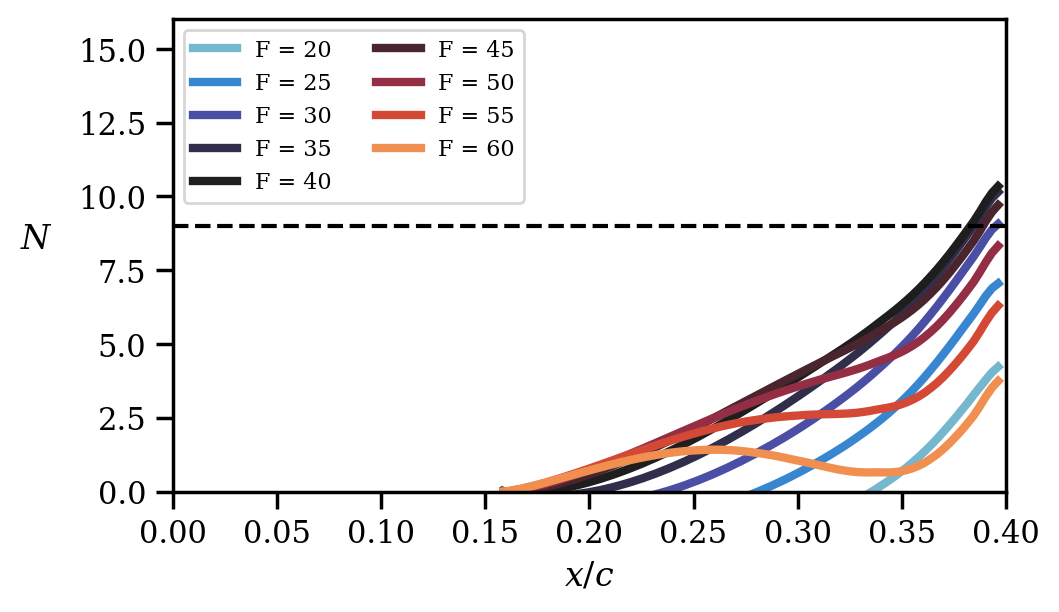

In [15]:
case_dirs = ['nlf_F20', 'nlf_F25', 'nlf_F30', 'nlf_F35', 'nlf_F40', 'nlf_F45', 'nlf_F50', 'nlf_F55', 'nlf_F60']
all_data = load_data(case_dirs)

# now we plot N factor vx xx for all cases using a for loop

count = 0
pt = 1./72.27 # Hundreds of years of history... 72.27 points to an inch.
my_width = 384.0 * pt
golden = (1 + 5 ** 0.5) / 2
my_height = my_width / golden

lw = 3
ms = 5

plt.figure(figsize=(my_width, my_height),dpi=200);
for case_name, case_data in all_data.items():
    buf = case_name.split('_')[1]
    label = f"F = {buf.split('F')[1]}"
    plt.plot(case_data['xx'], case_data['Nfactor'], '-', linewidth=lw, label=label, color=colors[count])
    count += 1

# plot a horizontal dashed line at N_factor = 9 
plt.axhline(y=9, color='k', linestyle='--')
plt.xlabel(r'$x/c$')
plt.ylabel(r'$N$', rotation = 0, labelpad=15)
plt.legend(ncols=2, fontsize=8)
plt.ylim(0,16)
plt.xlim(0, 0.4)
plt.tight_layout()
# plt.savefig('nlf_Nfactor_vs_x.pdf')

In [16]:
# iterate through all curves and find where N = 9 and print the x/c value
min_val = 1000
for case_name, case_data in all_data.items():
    buf = case_name.split('_')[1]
    label = f"F = {buf.split('F')[1]}"

    Nfactor = case_data['Nfactor']
    xx = case_data['xx']
    idx = np.argmin(np.abs(Nfactor - 9))
    print(f"{label}: x/c = {xx[idx]}")
    if xx[idx] < min_val:
        min_val = xx[idx]
        min_case = case_name
        min_idx = idx

print(f"Transition location = {min_val} for case {min_case}")


F = 20: x/c = 0.3961885763326313
F = 25: x/c = 0.3961885763326313
F = 30: x/c = 0.3961885763326313
F = 35: x/c = 0.3844426221457421
F = 40: x/c = 0.38150495033462273
F = 45: x/c = 0.39031657895314015
F = 50: x/c = 0.3961885763326313
F = 55: x/c = 0.3961885763326313
F = 60: x/c = 0.3961885763326313
Transition location = 0.38150495033462273 for case nlf_F40


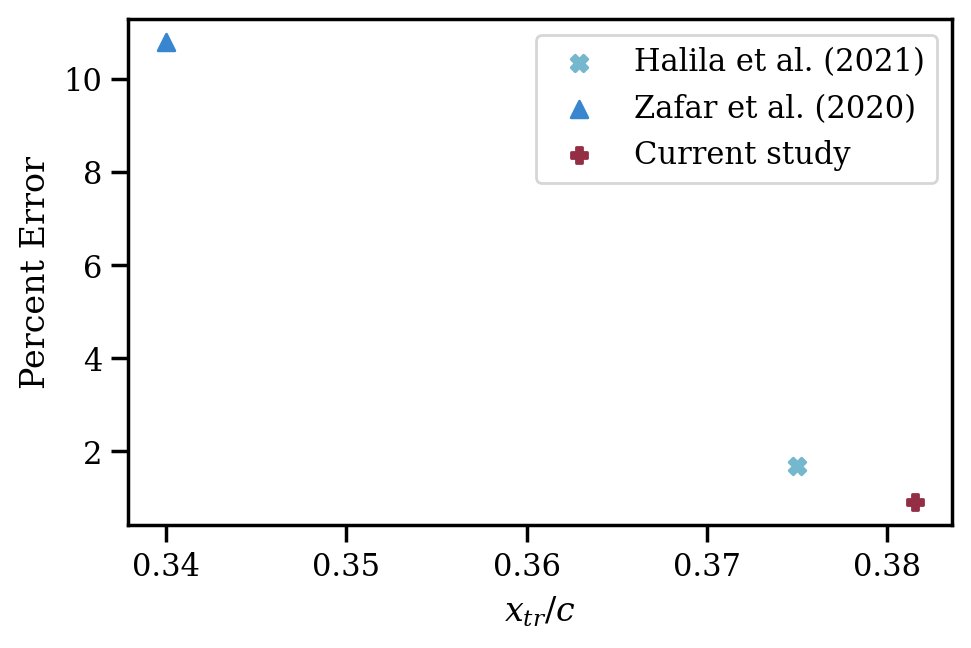

In [17]:
# Transition predictions 
experiment_x_tr = 0.385
halila_pse_x_tr = 0.375
zafar_lst_x_tr = 0.340

my_error = np.abs(min_val - experiment_x_tr) / experiment_x_tr * 100
halila_error = np.abs(min_val - halila_pse_x_tr) / experiment_x_tr * 100
zafar_error = np.abs(min_val - zafar_lst_x_tr) / experiment_x_tr * 100

plt.figure(figsize=(my_width, my_height),dpi=200);
plt.scatter(halila_pse_x_tr, halila_error, marker='X', color=colors[0], label='Halila et al. (2021)')
plt.scatter(zafar_lst_x_tr, zafar_error, marker='^', color=colors[1], label='Zafar et al. (2020)')
plt.scatter(min_val, my_error, marker='P', color=colors[6], label='Current study')

# plt.axhline(y=9, color='k', linestyle='--')
plt.xlabel(r'$x_{tr}/c$')
plt.ylabel(r'Percent Error')
plt.legend()


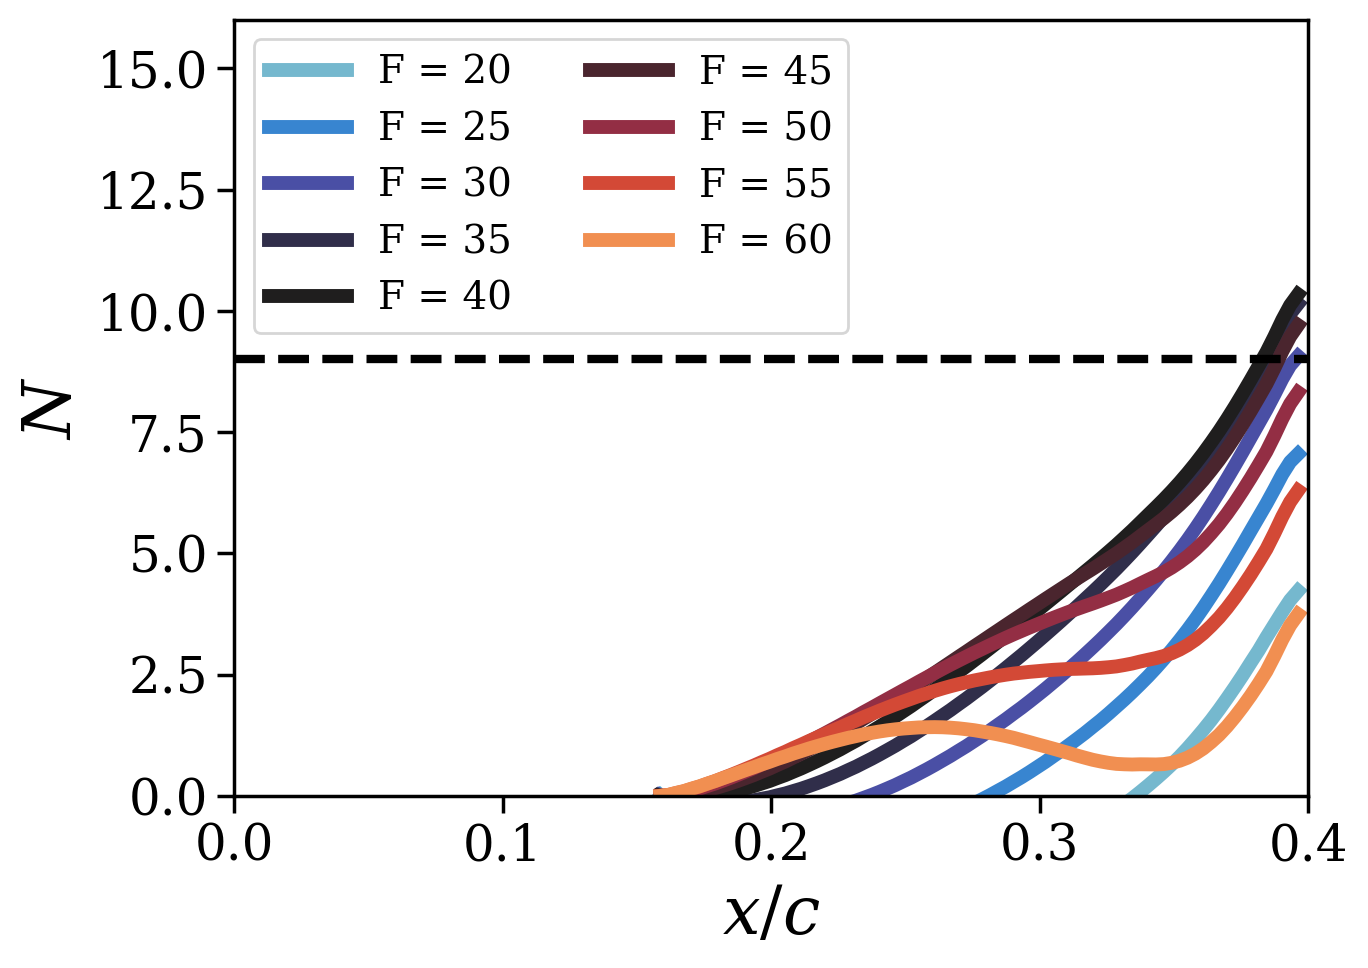

In [19]:
# for aps
case_dirs = ['nlf_F20', 'nlf_F25', 'nlf_F30', 'nlf_F35', 'nlf_F40', 'nlf_F45', 'nlf_F50', 'nlf_F55', 'nlf_F60']
all_data = load_data(case_dirs)

# now we plot N factor vx xx for all cases using a for loop

count = 0
pt = 1./72.27 # Hundreds of years of history... 72.27 points to an inch.
my_width = 384.0 * pt
golden = (1 + 5 ** 0.5) / 2
my_height = my_width / golden

lw = 5
ms = 5

plt.figure(figsize=(7, 5),dpi=200);
for case_name, case_data in all_data.items():
    buf = case_name.split('_')[1]
    label = f"F = {buf.split('F')[1]}"
    plt.plot(case_data['xx'], case_data['Nfactor'], '-', linewidth=lw, label=label, color=colors[count])
    count += 1

# plot a horizontal dashed line at N_factor = 9 
plt.axhline(y=9, color='k', linestyle='--', linewidth=3)
plt.xlabel(r'$x/c$', fontsize=24)
plt.ylabel(r'$N$', fontsize=24)
plt.legend(ncols=2, fontsize=14)
plt.ylim(0,16)
plt.xlim(0, 0.4)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=18)


plt.tight_layout()
plt.savefig('/home/moin/cagonzal/aps2024_nlf_Nfactor_vs_x.pdf')